<a href="https://colab.research.google.com/github/nataliasbsg/Red-de-clasificacion-de-animales/blob/main/TFM_Familias_Comparacion_de_Redes_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías

Se importan todas las librerías necesarias para realizar la red de clasificación de animales. En este caso se trabajará con librerías para trabajar con las imágenes y TensorFlow para las redes.

In [11]:
# Importación de archivos desde drive
from google.colab import drive

# Tratamiento de imágenes
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
from PIL import Image

# Librerías para la red
import tensorflow as tf
import tensorflow_datasets as tensorflow_datasets
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Interacción con ejemplos en URLs
import requests
from io import BytesIO

from datetime import datetime


# Lectura de imágenes desde Drive
Se accede a las imagenes contenidas en Drive. En este caso hay tres niveles de carpetas:
1. Base de Datos general. Una sola carpeta que contiene todas las familias de animales que se quieren estudiar. Por ejemplo: "Base de datos de animales".
2. Conjunto de carpetas de familias de animales que a su vez contienen las carpetas de especies animales de la misma familia (categories). Por ejemplo:  dentro de "Base de datos de animales" encontraríamos "Cánidos" y "Felinos".
3. Conjunto de carpetas de especies animales (subcategories). Contienen las imagenes con las que se va a trabajar. Por ejemplo: dentro de "Felinos" encontraríamos "Linces" y "Gatos".


Se estudiará la pertenencia a las familias de cada imagen y para ello se numerará la cantidad de imágenes de cada familia (no de cada especie) y se hará una copia de las imágenes clasificadas en la máquina virtual.

En este caso las familias y las especies de cada una son las siguientes:
0. Cánidos: zorros.
1. Cérvidos: ciervos y gamos.
2. Felinos: gatos y linces.
3. Herpéstidos: meloncillos.
4. Lepóridos: conejos y liebres.
5. Mustélidos: tejones.
6. Suidos: jabalíes.
7. Úrsidos: osos.
8. Vivérridos: ginetas.

In [12]:
# Se accede a drive y se piden los permisos al usuario para trabajar en su cuenta
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Dirección de la carpeta contenedora con la que se quiere trabajar
dir_train = '../content/drive/MyDrive/Colab Notebooks/BD_Familia' # path to directory with the images

# Se leen las carpetas contenidas en la direccion anterior y se ordenan y guardan en categories
categories = sorted(os.listdir(dir_train))
print('Las categorias de familias animales son:', categories)
categories_folders = [os.path.join(dir_train, categorie) for categorie in categories]

Las categorias de familias animales son: ['Cánidos', 'Cérvidos', 'Felinos', 'Herpéstidos', 'Lepóridos', 'Mustélidos', 'Suidos', 'Úrsidos', 'Vivérridos']


categories = ['Cánidos', 'Cérvidos', 'Felinos', 'Herpéstidos', 'Lepóridos', 'Mustélidos', 'Suidos', 'Úrsidos', 'Vivérridos']

subcategories = [['Zorros'], ['Ciervos', 'Gamos], ['Gatos', 'Linces'], ['Meloncillo'], ['Conejos', 'Liebres'], ['Tejones'], ['Jabalíes]', ['Osos'], ['Gineta']]


In [14]:
# Se inicializan variables 
num_images = [] # Guardara el numero de imagenes de cada categoria
subcategories = [] # Guardara las subcategorias de cada categoria (subcarpetas)

for categorie in categories:
  num_images_sub = 0
  # Se leen las subcarpetas de las carpetas (las especies de las familias)
  subcategories.append(sorted(os.listdir('/content/drive/MyDrive/Colab Notebooks/BD_Familia/{}'.format(categorie))))

  try:
    # Se crean directorios en la maquina virtual
    os.makedirs("dataset/{}".format(categorie))
    os.makedirs("test/{}".format(categorie))
  except:
    pass

  for subcategorie in subcategories[categories.index(categorie)]:
    num_images_sub = num_images_sub + len(os.listdir('/content/drive/MyDrive/Colab Notebooks/BD_Familia/{}/{}'.format(categorie, subcategorie)))

  # Se guarda el numero de imagenes de cada categoria (familia)
  num_images.append(num_images_sub)

print('El numero de imagenes de cada categoria es:', num_images)

# Se establece un limite con la carpeta con el menor numero de imagenes 
limit_image = min(num_images)
print('Se utilizarán', limit_image, 'imagenes de cada categoria')


El numero de imagenes de cada categoria es: [2656, 2572, 4139, 2069, 3764, 5608, 1879, 1811, 1821]
Se utilizarán 1811 imagenes de cada categoria


In [15]:
# Se limita el numero de imagenes para equilibrar las clases
for i, categorie in enumerate(categories):
  for subcategorie in subcategories[i]:
    carpeta_fuente = '/content/drive/MyDrive/Colab Notebooks/BD_Familia/{}/{}'.format(categorie, subcategorie)
    carpeta_destino = '/content/dataset/{}'.format(categorie)
    carpeta_test = '/content/test/{}'.format(categorie)
    imagenes = [img for j, img in enumerate(os.listdir(carpeta_fuente)) if j<limit_image/len(subcategories[i])]
    imagenes, img_test = train_test_split(imagenes, test_size = 0.01, shuffle = True)
    print('El numero de imagenes guardadas para test de la subcategoria', subcategorie, 'es', len(img_test))
    for nombreimg in imagenes:
      path = os.path.join('/content/drive/MyDrive/Colab Notebooks/BD_Familia/{}/{}'.format(categorie, subcategorie), nombreimg)
      shutil.copy(path, carpeta_destino + '/' + nombreimg)

    # Se guardan parte de las imágenes para los test finales
    for nombreimg in img_test:
      path = os.path.join('/content/drive/MyDrive/Colab Notebooks/BD_Familia/{}/{}'.format(categorie, subcategorie), nombreimg)
      shutil.copy(path, carpeta_test + '/' + nombreimg)

El numero de imagenes guardadas para test de la subcategoria Zorro es 19
El numero de imagenes guardadas para test de la subcategoria Ciervo es 10
El numero de imagenes guardadas para test de la subcategoria Gamo es 10
El numero de imagenes guardadas para test de la subcategoria Gato montes es 10
El numero de imagenes guardadas para test de la subcategoria Lince ibérico es 10
El numero de imagenes guardadas para test de la subcategoria Meloncillo es 19
El numero de imagenes guardadas para test de la subcategoria Conejo es 10
El numero de imagenes guardadas para test de la subcategoria Liebre es 10
El numero de imagenes guardadas para test de la subcategoria Tejón es 19
El numero de imagenes guardadas para test de la subcategoria Jabalí es 19
El numero de imagenes guardadas para test de la subcategoria Oso pardo es 19
El numero de imagenes guardadas para test de la subcategoria Gineta es 19


Found 13010 images belonging to 9 classes.
Found 3247 images belonging to 9 classes.


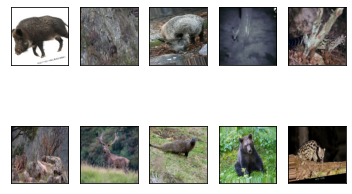

In [16]:
# Se crea el dataset generador para aumenar el numero de imagenes con las que se trabaja
datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 25,
    zoom_range = [0.75, 1.25],
    horizontal_flip=True,
    validation_split = 0.2 #20% para pruebas
)

# Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

# Se imprimen 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


# Entrenamiento de red

Debido a que el número de imagenes de animales el limitado una buena opción es entrenar una red que ya haya sido entrenada. En Tensor Flow Hub (https://tfhub.dev/) se encuentran muchas opciones de redes ya entrenadas. En nuestro caso hemos escogido una red de clasificación multiclase para reentrenarla con nuestras imágenes.

In [17]:
class Netmodel:
  def __init__(self, url, epocas, categorias, train_data, valid_data, img_size):
    self.epocas = epocas
    self.train_data = train_data
    self.valid_data = valid_data
    self.img_size = img_size

    # Se escoge una red de clasificación multiclase para reentrenarla con nuestros datos
    mobilenetv2 = hub.KerasLayer(url, input_shape=(img_size,img_size,3))

    # Se congela el modelo descargado
    mobilenetv2.trainable = False

    self.modelo = tf.keras.Sequential([
        mobilenetv2,
        tf.keras.layers.Dense(len(categories), activation='softmax')
    ])

    self.modelo.summary()

  def compile_model(self):
    # Se compila el modelo
    self.modelo.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

  def train_model(self):
    # Se reentrena la red
    t0 = datetime.now()
    self.historial = self.modelo.fit(
        data_gen_entrenamiento, epochs=self.epocas, batch_size=32,
        validation_data=data_gen_pruebas
    )
    t1 = datetime.now()
    print('El tiempo de entrenamiento de la red ha sido:', str(t1-t0))

  def grafic_model(self):
    # Se muestran los resultados con graficas de precisión
    acc = self.historial.history['accuracy']
    val_acc = self.historial.history['val_accuracy']

    loss = self.historial.history['loss']
    val_loss = self.historial.history['val_loss']

    rango_epocas = range(self.epocas)

    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
    plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
    plt.legend(loc='lower right')
    plt.title('Precisión de entrenamiento y pruebas')

    plt.subplot(1,2,2)
    plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
    plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
    plt.legend(loc='upper right')
    plt.title('Pérdida de entrenamiento y pruebas')
    plt.show()

In [18]:
EPOCAS = 10

# Mobilenet V3



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5508713   
                                                                 
 dense (Dense)               (None, 9)                 9018      
                                                                 
Total params: 5,517,731
Trainable params: 9,018
Non-trainable params: 5,508,713
_________________________________________________________________
Epoch 1/10
407/407 [==============================] - ETA: 0s - loss: 0.4369 - accuracy: 0.8663

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


407/407 [==============================] - 674s 2s/step - loss: 0.4369 - accuracy: 0.8663 - val_loss: 0.2896 - val_accuracy: 0.9107
Epoch 2/10
407/407 [==============================] - 673s 2s/step - loss: 0.2283 - accuracy: 0.9282 - val_loss: 0.3119 - val_accuracy: 0.9021
Epoch 3/10
407/407 [==============================] - 735s 2s/step - loss: 0.1962 - accuracy: 0.9394 - val_loss: 0.2786 - val_accuracy: 0.9187
Epoch 4/10
407/407 [==============================] - 682s 2s/step - loss: 0.1806 - accuracy: 0.9427 - val_loss: 0.2803 - val_accuracy: 0.9159
Epoch 5/10
407/407 [==============================] - 679s 2s/step - loss: 0.1684 - accuracy: 0.9457 - val_loss: 0.2694 - val_accuracy: 0.9184
Epoch 6/10
407/407 [==============================] - 738s 2s/step - loss: 0.1567 - accuracy: 0.9511 - val_loss: 0.2695 - val_accuracy: 0.9224
Epoch 7/10
407/407 [==============================] - 685s 2s/step - loss: 0.1480 - accuracy: 0.9534 - val_loss: 0.3045 - val_accuracy: 0.9168
Epoch 8/10

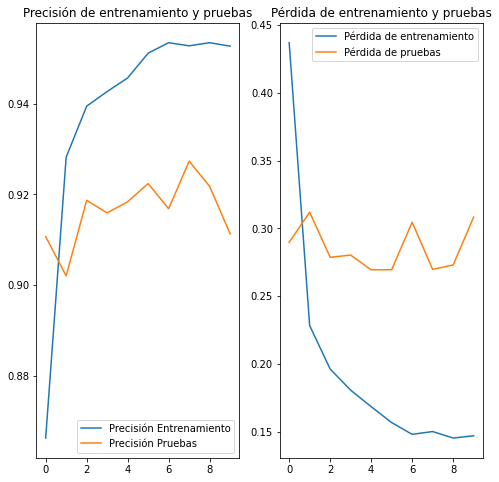

In [19]:
modelo = Netmodel(url="https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5", epocas=EPOCAS,categorias=categories, train_data=data_gen_entrenamiento, valid_data=data_gen_pruebas, img_size=224) 
modelo.compile_model()
modelo.train_model()
modelo.grafic_model()

# Mobilenet V2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 9)                 11529     
                                                                 
Total params: 2,269,513
Trainable params: 11,529
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/10
407/407 [==============================] - ETA: 0s - loss: 0.4607 - accuracy: 0.8602

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


407/407 [==============================] - 703s 2s/step - loss: 0.4607 - accuracy: 0.8602 - val_loss: 0.3209 - val_accuracy: 0.9027
Epoch 2/10
407/407 [==============================] - 689s 2s/step - loss: 0.2565 - accuracy: 0.9212 - val_loss: 0.2811 - val_accuracy: 0.9091
Epoch 3/10
407/407 [==============================] - 689s 2s/step - loss: 0.2324 - accuracy: 0.9227 - val_loss: 0.2589 - val_accuracy: 0.9138
Epoch 4/10
407/407 [==============================] - 682s 2s/step - loss: 0.1976 - accuracy: 0.9364 - val_loss: 0.2542 - val_accuracy: 0.9138
Epoch 5/10
407/407 [==============================] - 680s 2s/step - loss: 0.1888 - accuracy: 0.9374 - val_loss: 0.2426 - val_accuracy: 0.9187
Epoch 6/10
407/407 [==============================] - 681s 2s/step - loss: 0.1811 - accuracy: 0.9410 - val_loss: 0.2511 - val_accuracy: 0.9150
Epoch 7/10
407/407 [==============================] - 679s 2s/step - loss: 0.1734 - accuracy: 0.9455 - val_loss: 0.2680 - val_accuracy: 0.9196
Epoch 8/10

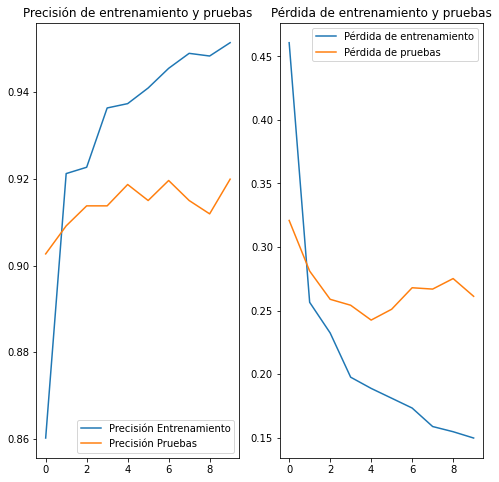

In [20]:
modelo = Netmodel(url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", epocas=EPOCAS,categorias=categories, train_data=data_gen_entrenamiento, valid_data=data_gen_pruebas, img_size=224) 
modelo.compile_model()
modelo.train_model()
modelo.grafic_model()

# Inception V3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              23853833  
                                                                 
 dense_2 (Dense)             (None, 9)                 9018      
                                                                 
Total params: 23,862,851
Trainable params: 9,018
Non-trainable params: 23,853,833
_________________________________________________________________
Epoch 1/10
407/407 [==============================] - ETA: 0s - loss: 0.5720 - accuracy: 0.8362

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


407/407 [==============================] - 1997s 5s/step - loss: 0.5720 - accuracy: 0.8362 - val_loss: 0.3708 - val_accuracy: 0.8941
Epoch 2/10
407/407 [==============================] - 1993s 5s/step - loss: 0.3542 - accuracy: 0.8909 - val_loss: 0.3551 - val_accuracy: 0.8971
Epoch 3/10
407/407 [==============================] - 1941s 5s/step - loss: 0.3277 - accuracy: 0.9005 - val_loss: 0.3431 - val_accuracy: 0.9030
Epoch 4/10
407/407 [==============================] - 1946s 5s/step - loss: 0.3031 - accuracy: 0.9038 - val_loss: 0.3468 - val_accuracy: 0.8984
Epoch 5/10
407/407 [==============================] - 1954s 5s/step - loss: 0.3023 - accuracy: 0.9075 - val_loss: 0.3588 - val_accuracy: 0.9119
Epoch 6/10
407/407 [==============================] - 1947s 5s/step - loss: 0.2961 - accuracy: 0.9100 - val_loss: 0.3602 - val_accuracy: 0.8981
Epoch 7/10
407/407 [==============================] - 1945s 5s/step - loss: 0.2847 - accuracy: 0.9143 - val_loss: 0.3582 - val_accuracy: 0.9101
Epo

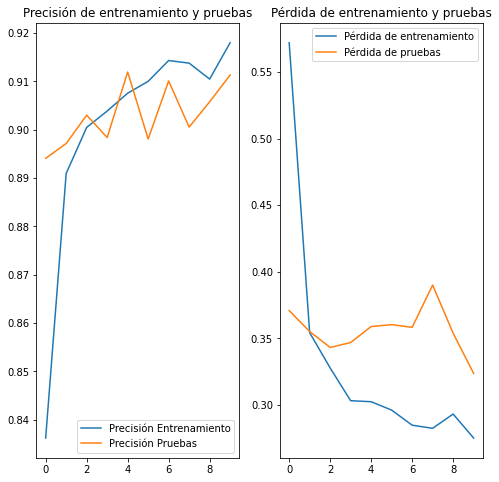

In [21]:
modelo = Netmodel(url="https://tfhub.dev/google/imagenet/inception_v3/classification/5", epocas=EPOCAS,categorias=categories, train_data=data_gen_entrenamiento, valid_data=data_gen_pruebas, img_size=224) 
modelo.compile_model()
modelo.train_model()
modelo.grafic_model()

# Conclusiones
Este bloque tiene el objetivo de elegir la red preentrenada más óptima para nuestro caso en concreto. Para ello, se han probado las redes que resultaron más ótimas en el caso anterior. Se aumentaron el número de épocas para buscar los mejores resultados posibles. Sin embargo, si nos fijamos en la precisiónde validación odemos contatar que los resultasdos son semejantes a los obtenidos con menos épocas. En el caso de contar con más imágenes sí que podría resultar de utilidad el hecho de aumentar épocas, pero en nuestro caso en concreto carece de sentido.



Estos son los resultados de la última época de cada red reentrenada:
1. Mobilenet V3:

  loss: 0.1470 - accuracy: 0.9527 - val_loss: 0.3082 - val_accuracy: 0.9113

  El tiempo de entrenamiento de la red ha sido: 1h 57m 32s


2. Mobilenet V2:

  loss: 0.1498 - accuracy: 0.9514 - val_loss: 0.2613 - val_accuracy: 0.9199

  El tiempo de entrenamiento de la red ha sido: 1h 55m 48s


3. Inception V3

  loss: 0.2751 - accuracy: 0.9180 - val_loss: 0.3236 - val_accuracy: 0.9113
  
  El tiempo de entrenamiento de la red ha sido: 5h 28m 11s

Las redes con arquitectura Mobilenet destacan por ser las más rápidas y, puesto que el tiempo de cómputo entre Mobilenet e Inception es considerable y los resultados son semejantes se optará por una arquitectura Mobilenet.
Teóricamente Mobilent V3 presenta ventajas respecto a precisión y rapidez frente a Mobilent V2, pero en nuestro caso en concreto los resultados son casi iguales, por lo que optaremos por Mobilenet V2.